#1 지도학습-분류

분류(Classification)는 학습데이터로 주어진 데이터의 피처와 레이블 값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블값을 예측 하는것

**대표적인 분류 알고리즘**
 - 베이즈(Bayes) 통계와 생성 모델에 기반한 나이브 베이즈(Naive Bayes)
 - 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)
 - 데이터 균일도에 따른 규칙 기반의 결정트리(Decision Tree)
 - 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신(Support Vector machine)
 - 근접 거리를 기준으로 하는 최소 근접(Nearest Neighbor) 알고리즘
 - 심층 연결 기반의 신경망(Neural Network)
 - 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블(Ensemble)





 # 2 DT와 Ensemble(Bagging, Boosting)
 - DT는 매우 쉽고 유연하게 적용될 수 있는 알고리즘. 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적음. 하지만 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하여, 이로 인한 과적합(Overfitting)이 발생해 반대로 예측 성능이 저하될 수도 있다는 단점

 -앙상블 기법에서는 오히려 장점으로 작용. 앙상블은 매우 많은 여러개의 약한 학습기(즉, 예측 성능이 상대적으로 떨어지는 학습 알고리즘)을 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트 하면서 예측 성능을 향상시키는데, DT가 좋은 약한 학습기가 되기 때문(GBM, LightGBM etc)


## 결정트리(Decision Tree)

- if/else 로 스무고개?


- 결정 트리(Decision Tree, 의사결정트리, 의사결정나무라고도 함)는 분류(Classification)와 회귀(Regression) 모두 가능한 지도 학습 모델.
- 매, 펭귄, 돌고래, 곰 분류
<figure>
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FwlH1u%2FbtqwWZI9Xen%2FkFJDjGSFJAPxhyatC3Xhs0%2Fimg.png' width=700 height=300>
</figure>

특정 기준(질문)에 따라 데이터를 구분하는 모델을 결정 트리 모델이라고 함.

<figure>
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fdy5OwG%2FbtqDwdHofoT%2FNtDy9lqXkhWTRTwEz6txd0%2Fimg.png' width=700 height=300>
</figure>

많은 규칙이 있으면 분류를 결정하는 방식이 복잡해짐: 과적합



## 데이터의 균일도

<figure>
    <img src='https://blog.kakaocdn.net/dn/dhoo7N/btqDvzqEhPH/QdOsfkqc2hcwHISIh0peo1/img.png' width=700 height=300>
</figure>


위 그림에서는 C > B > A 순으로 균일도가 높다고 할 수 있음. C는 모두 파란색 공으로 데이터가 모두 균일한 상태. B의 경우는 일부의 하얀색 공을 가지고 있지만 대부분 파란색 공으로 구성되어 있어 C다음으로 균일도가 높음. 이러한 데이터 세트에서 균일도는 분류 성능에 대한 정보를 제공



정보의 균일도를 측정하는 대표적인 방법에는 엔트로피를 이용한 정보 이득(Information Gain)지수와 지니계수

### 불순도(Impurity)


불순도(Impurity)란 해당 범주 안에 서로 다른 데이터가 얼마나 섞여 있는지 의미
아래 그림에서 위쪽 범주는 불순도가 낮고, 아래쪽 범주는 불순도가 높음. 즉, 위쪽 범주는 순도(Purity)가 높고, 아래쪽 범주는 순도가 낮음
위쪽 범주는 다 빨간점인데 하나만 파란점이므로 불순도가 낮은 반면 아래쪽 범주는 5개는 파란점, 3개는 빨간점으로 서로 다른 데이터가 많이 섞여 있어 불순도가 높음.


<figure>
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FqLXhZ%2FbtqwWyZl6iV%2FUZnQbf9L5HAFzf6hFfxK71%2Fimg.png' width=400 height=300>
</figure>


한 범주에 하나의 데이터만 있다면 불순도가 최소(혹은 순도가 최대)이고, 한 범주 안에 서로 다른 두 데이터가 정확히 반반 있다면 불순도가 최대(혹은 순도가 최소).
결정 트리는 불순도를 최소화(혹은 순도를 최대화)하는 방향으로 학습을 진행.

엔트로피(Entropy): 불순도(Impurity)를 수치적으로 나타낸 척도. 엔트로피가 높다는 것은 불순도가 높다는 뜻이고, 엔트로피가 낮다는 것은 불순도가 낮음을 의미
엔트로피가 1이면 불순도가 최대. 즉, 한 범주 안에 서로 다른 데이터가 정확히 반반 있음.
엔트로피가 0이면 불순도는 최소. 한 범주 안에 하나의 데이터만 있음

### 정보 이득(Information Gain)

정보 이득은 엔트로피라는 개념을 기반으로 함. 엔트로피는 주어진 데이터 집합의 혼잡도를 의미, 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮음. 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값. 즉, 1-엔트로피 지수. 결정트리는 이 정보 이득 지수로 분할 기준을 정함. 즉, 정보 이득이 높은 속성을 기준으로 분할


### 지니 계수(Gini Index)

불평등 지수를 나타낼 때 사용하는 계수. 경제학자인 코라도 지니(Corrado Gini)의 이름에서 딴 계수로서 0이 가장 평등하고 1로 갈수록 불평등함. 머신러닝에 적용될 때는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석 되어, 계수가 낮은 속성을 기준으로 분할.

A 영역에 속한 모든 레코드가 동일한 범주에 속할 경우(=불확실성 최소=순도 최대) 엔트로피는 0.
범주가 둘뿐이고 해당 개체의 수가 동일하게 반반씩 섞여 있을 경우(=불확실성 최대=순도 최소) 엔트로피는 1


##  DT 주요 hyperparameter

1. max_depth
 - 트리의 최대 깊이를 규정
 - defualt 는 None.None으로 설정하면 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_samples_split 보다 작아질 때까지 게속 깊이를 증가시킴.
 - 깊이가 깊어지면, min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요

2. max_features
 - 최적의 분할을 위해 고려할 최대 피쳐 개수, 디폴트는 None으로 데이터 세트의 모든 피처를 사용해 분할 수행.
 - int 형으로 지정하면 대상 피처의 개수, float 형으로 지정하면 전체 피처 중 대상 피처의 퍼센트임.
 - 'sqrt'는 전체 피처 중 sqrt(전체 피처 개수) 즉 ${\sqrt {전체 피처}}$개수 만큼 선정.
 - 'auto'로 지정하면 sqrt와 동일
 - 'log'는 전체 피처 중 log2(전체 피처 개수) 선정
 - 'None'은 전체 피처 선정

3. min_samples_split
 - 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는 데 사용됨.
 - 디폴트는 2이고 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가
 - 과적합을 제어, 1로 설정하는 경우 분할되는 노드가 많아져서 과적합 가능성 증가
4. min_samples_leaf
 - 말단 노드(leaf)가 되기 위한 최소한의 샘플 데이터 수
 - min_samples_split와 유사하게 과적합 제어 용도. 그러나 비대칭적(imbalanced) 데이터의 경우 클래스의 데이터가 극도로 작을 수 있으므로, 이 경우는 작게 설정 필요.

5. max_leaf_nodes
 - 말단 노드(Leaf)의 최대 개수.


**결정트리를 그리가 위해 graphviz를 이용함**

In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 예제 학습데이터

In [ ]:
import pandas as pd
# 데이터 정의
data = pd.DataFrame({"no_insects":["True","True","True","False","True","True","True","True","True","False"],
                     "no_dead":["True","True","False","True","True","True","False","False","True","False"],
                     "no_wilting":["True","True","True","True","True","True","False","True","True","True"],
                     "no_diseases":["True","True","False","True","True","True","False","False","True","True"],
                     "tree_health":["Good","Good","Poor","Good","Good","Good","Poor","Poor","Good","Poor"]},
                    columns=["no_insects","no_dead","no_wilting","no_diseases","tree_health"])
# 기술 속성(descriptive features)
features = data[["no_insects","no_dead","no_wilting","no_diseases"]]
# 대상 속성(target feature)
target = data["tree_health"]
print(data)


  no_insects no_dead no_wilting no_diseases tree_health
0       True    True       True        True        Good
1       True    True       True        True        Good
2       True   False       True       False        Poor
3      False    True       True        True        Good
4       True    True       True        True        Good
5       True    True       True        True        Good
6       True   False      False       False        Poor
7       True   False       True       False        Poor
8       True    True       True        True        Good
9      False   False       True        True        Poor


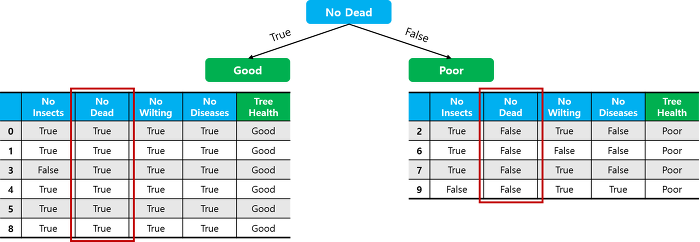

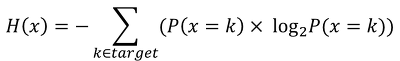

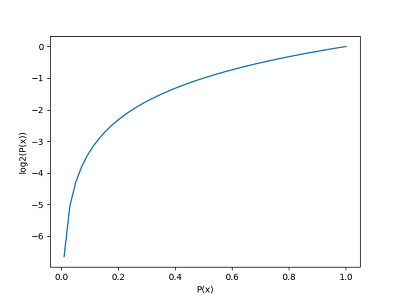

In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 3 DT의 시각화


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(min_samples_leaf=6,random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습.
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(min_samples_leaf=6, random_state=156)

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

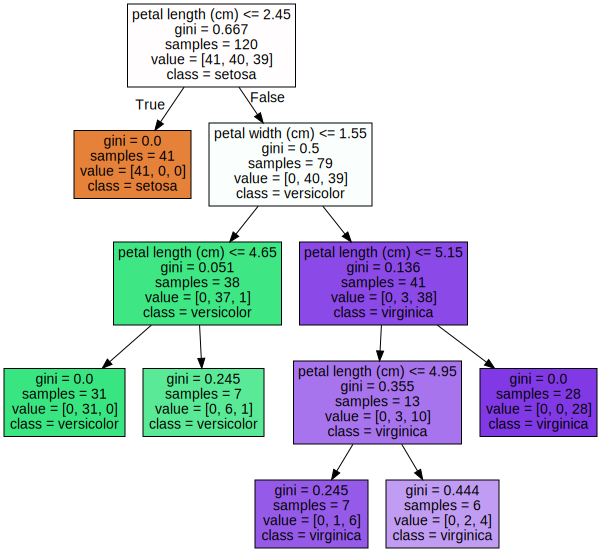

In [ ]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.    0.    0.567 0.433]
sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.567
petal width (cm) : 0.433


<AxesSubplot:>

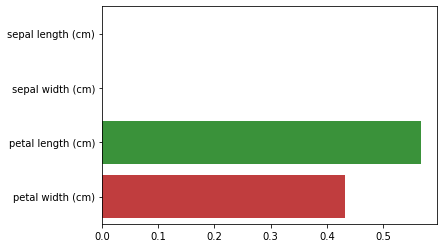

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

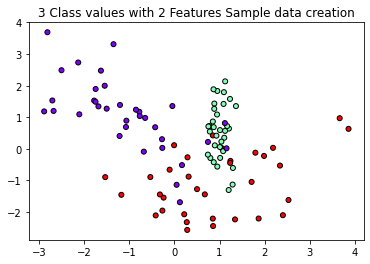

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

## DT의 과대 적합을 최소화

1. 사전 가지치기(Pre-pruning)



<figure>
<img src='http://i.imgur.com/MVFcKwz.png' width=500 height=500>
</figure>



2. DT 이후 데이터 포인트가 적은 노드를 삭제 또는 병합

- Scickit-learn에서 결정트리는 DecisionTree Regressor와 DecisionTreeClassifier이 구현 되어 있음





# 4 예제 데이터로 살펴보는 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

#예제 데이터 읽기

X_train, X_test, y_train, y_test = train_test_split(
    # 여기에 입력
    , random_state=42) # stratify : target:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [ ]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_pred)))

- DT

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

In [ ]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

- Feature Importance in trees

In [ ]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


# 5 랜덤 포레스트(Random Forest)

- 오늘날 쓰이는 머신 러닝 알고리즘 중에서 **가장 강력한 성능을 자랑하는 알고리즘**

- 랜덤 포레스트는 이 중 **배깅 방법**을 적용한 결정트리(Decison Tree)의 앙상블

- 랜덤 포레스트 알고리즘은 **결정트리(Decision Tree) 분류기 여러 개를 훈련**시켜서 그 결과들을 가지고 예측을 함. 각각의 결정트리를 훈련시킬 때 배깅(Bagging). 즉, 훈련 세트에서 중복을 허용하여 샘플링한 데이터셋을 개별 결정트리 분류기의 훈련 세트로 하여 훈련시키는 방식.


#### 장점 :
1. 분류, 회귀에서 가장 널리 쓰이는 알고리즘으로 성능이 좋고 정확도가 높다
2. 간편하고 빠르다.
3. 큰 데이터 셋에서도 잘 사용되며, 많은 입력 변수들을 다룰 수 있다.

#### 단점 :
1. 속도와 메모리 비용이 상대적(linear에 비해)으로 큼
(더 많은 트리 -> 정확도는 높아지나 시간과 리소스 소모가 큼)

2. 트리 깊이와 개수 설정을 잘못하여 과적합(Overfiting)발생.




#### 랜덤 포레스튼튼 훈련을 통해 구성해 놓은 다수의 의사결정트리들로부터 분류 결과를 취합해서 예측하는 앙상블 모델이라고 할 수 있음.

<figure>
    <img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSdQRp2AYzLvDCg88pi6c2CRYQ_6qNBGVDn7A&usqp=CAU' width=700 height=300>
</figure>



##코드 실습


##### 배깅(Bagging)

- 통계학에서 중복한 허용한 리샘플링(resampling)을 부트스트래핑(boostraping)이라 하고 이와 반대로 중복을 허용하지 않는 샘플링 방식을 페이스팅(pasting)이라고 함.



ex) 10만개의 데이터 중 7만 5천개의 데이터를 학습데이터로 사용한다고 가정하면

7만 5천개의 데이터를 가지고 여러 데이터 셋으로 나눈다면 학습데이터가 부족해지고 이로인해 모형들이 편향히 생기거나 분산이 커지는 문제가 생길 수 있음.

하지만 배깅의 경우는 복원추출(Resampling)을 하기 때문에 어떤 데이터는 여러번 뽑힐 수 있고 어떤 데이터는 한번도 뽑히지 않을 수도 있다 때문에 75000개의 데이터를 가지고 75000번을 추출해도 75000가지의 서로 다른 샘플데이터를 추출할 수 있게 됨.

이 특성을 이용해 조금씩 다른 모델들을 만들고 그것들의 결과를 취합

데이터가 비슷하니 결과도 별 차이가 없다고 생각할 수 있지만 데이터가 빼곡해지는 효과가 있고, 조금씩 다른 모델들이 투표를 하는 방식으므로 배깅으로 만들어진 앙상블 모델은 결과들에 대한 편차가 크지 않고 안정적인 결과를 보여지도록 향상됨.

학습데이터가 원래 편향이 있다면 그로 인한 편향문제까지는 해결하지 못하지만 미지의 데이터(Unseen data)에 상당히 괜찮은 성능을 보이고 노이즈나 아웃라이어에 대해서도 강해지는 것으로 알려져 있음.



<figure>
    <img src='https://miro.medium.com/max/1678/1*Wf91XObaX2zwow7mMwDmGw.png' width=700 height=300>
</figure>

출처 : https://eunsukimme.github.io/ml/2019/11/26/Random-Forest/

- 이 의사결정나무들은 모두 같은 의사결정나무일 수가 없음

- Bootstrap으로 샘플을 추출했기 때문에, 어느 정도의 중복과 함께 각기 다른 샘플로 의사 결정나무 모델을 생성


##  Hyperparameter
- n_estimators: 랜덤 포레스트 안의 결정 트리 갯수

 - n_estimators는 클수록 좋습니다.
 - 결정 트리가 많을수록 피팅, 하지만 그만큼 메모리와 훈련 시간이 증가.
Default는 10
 - max_features: 무작위로 선택할 Feature의 개수

-  max_features=n_features이면 30개의 feature 중 30개의 feature 모두를 선택해 결정 트리. bootstrap=True이면 30개의 feature에서 복원 추출로 30개.
-  특성 선택의 무작위성이 없어질 뿐 샘플링의 무작위성은 유지
-  bootstrap=True는 default 값
-  따라서 max_features 값이 크다면 랜덤 포레스트의 트리들이 비슷하게 되며 가장 두드러진 특성에 맞게 예측.
-  max_features 값이 작다면 랜덤 포레스트의 트리들이 서로 매우 다르며 오버피팅이 감소
-  max_features는 일반적으로 Defalut 값,  

- max_depth : 트리의 깊이

-  min_samples_leaf : 리프노드가 되기 위한 최소한의 샘플 데이터 수

-  min_samples_split : 노드를 분할하기 위한 최소한의 데이터 수

-  max_leaf_nodes : 리프노드의 최대 개수




# 6 분류모형 활용

In [ ]:
#위의 데이터에서 target 키값의 값이 target, data가 feature가 되게 하여. 전처리를 적용(결측치, 스케일링(minmax), 파티셔닝(8:2),.... )

#1. 분류모델링: DT 이용

#2. 각 모델링마다 test에 대해서  classification_report 결과를 제시

In [ ]:
from sklearn.datasets import load_digits
mnist = load_digits()
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
from sklearn.datasets import load_digits
mnist = load_digits()
mnist.keys()

#1. 전처리
X = mnist.data
y = mnist.target
X.shape
y.shape

(1797,)

In [ ]:
import pandas as pd
pd.DataFrame(X).isnull().mean()
X_scaled = X/255

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2)


In [ ]:
#1. DT
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier().fit(X_train, y_train)
pred1 = model1.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report( pred1, y_test))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        30
           1       0.82      0.89      0.85        36
           2       0.83      0.88      0.86        34
           3       0.91      0.78      0.84        41
           4       0.90      0.85      0.88        41
           5       0.89      0.85      0.87        39
           6       0.94      0.97      0.96        34
           7       0.81      0.88      0.85        34
           8       0.70      0.74      0.72        31
           9       0.82      0.82      0.82        40

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.86       360



In [ ]:
from sklearn import model_selection
from sklearn import metrics

param_grid = {
    "max_depth":[1,3,5,7,9]
}
#declaring GridSearchCV model
grid1 = model_selection.GridSearchCV(
    estimator = model1, #모형
    param_grid = param_grid,  #
    scoring = 'accuracy', #정분류율
    verbose = 10,
    n_jobs = 1,
    cv = 5      #k-fold CV, k값.
)
#fitting values to the gridsearchcv model
grid1.fit(X_train,y_train)

#printing the best possible values to enhance accuracy
print(grid1.best_params_)
print(grid1.best_estimator_)
#printing the best score
print(grid1.best_score_)


In [ ]:
#2. RF
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier().fit(X_train, y_train)
pred2 = model2.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report( pred2, y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       0.97      0.95      0.96        40
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        35
           4       1.00      0.95      0.97        41
           5       0.97      0.95      0.96        38
           6       0.97      1.00      0.99        34
           7       1.00      1.00      1.00        37
           8       0.94      1.00      0.97        31
           9       0.97      0.97      0.97        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [ ]:
from sklearn import model_selection
from sklearn import metrics

param_grid = {
    "n_estimators":[100,150,200],
    "max_depth":[1,3,5,7,9]
}

#declaring GridSearchCV model
grid2 = model_selection.GridSearchCV(
    estimator = model2,
    param_grid = param_grid,
    scoring = 'accuracy',
    verbose = 10,
    n_jobs = 1,
    cv = 5
)

#fitting values to the gridsearchcv model
grid2.fit(X_train,y_train)
#printing the best possible values to enhance accuracy
print(grid2.best_params_)
print(grid2.best_estimator_)
#printing the best score
print(grid2.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START max_depth=1, n_estimators=100..............................
[CV 1/5; 1/15] END max_depth=1, n_estimators=100;, score=0.722 total time=   0.2s
[CV 2/5; 1/15] START max_depth=1, n_estimators=100..............................
[CV 2/5; 1/15] END max_depth=1, n_estimators=100;, score=0.743 total time=   0.2s
[CV 3/5; 1/15] START max_depth=1, n_estimators=100..............................
[CV 3/5; 1/15] END max_depth=1, n_estimators=100;, score=0.690 total time=   0.2s
[CV 4/5; 1/15] START max_depth=1, n_estimators=100..............................
[CV 4/5; 1/15] END max_depth=1, n_estimators=100;, score=0.645 total time=   0.2s
[CV 5/5; 1/15] START max_depth=1, n_estimators=100..............................
[CV 5/5; 1/15] END max_depth=1, n_estimators=100;, score=0.624 total time=   0.2s
[CV 1/5; 2/15] START max_depth=1, n_estimators=150..............................
[CV 1/5; 2/15] END max_depth=1, n_estimator

# 7 Adaboost, Gradient Boosting, XGBoost



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression


#### Classification Dataset
- make_classification() function 이용하여 Binary 분류 데이터셋 생성
- 1,000 행 10 열


In [ ]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)


(1000, 10) (1000,)


In [ ]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = [iris.target_names[x] for x in iris.target]

X2 = df.drop('species', axis=1)
y2 = df['species']


### 1. Adaboost


In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

clf = AdaBoostClassifier( n_estimators=5, learning_rate=0.5, random_state=100).fit(X,y)
clf = AdaBoostClassifier( base_estimator=DecisionTreeClassifier(max_depth=1, min_samples_leaf=10),#base_estimator를 변경할 수 있음
            n_estimators=5,  learning_rate=0.5, random_state=100 ).fit(X,y)

In [ ]:
#iris로 테스트
clf = AdaBoostClassifier( base_estimator=DecisionTreeClassifier(max_depth=1, min_samples_leaf=10),#base_estimator를 변경할 수 있음
            n_estimators=5,  learning_rate=0.5, random_state=100).fit(X2,y2)

In [ ]:
## 예측
print(clf.predict(X2)[:3])

## 변수 중요도
for i, col in enumerate(X2.columns):
    print(f'{col} Importance : {clf.feature_importances_[i]}')

print(clf.get_params())
print('Accuracy : ', clf.score(X2,y2))


['setosa' 'setosa' 'setosa']
sepal length (cm) Importance : 0.0
sepal width (cm) Importance : 0.0
petal length (cm) Importance : 0.4
petal width (cm) Importance : 0.6
{'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 10, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(max_depth=1, min_samples_leaf=10), 'estimator': None, 'learning_rate': 0.5, 'n_estimators': 5, 'random_state': 100}
Accuracy :  0.9533333333333334


In [ ]:
for i in range(len(clf.estimators_)):
    ind_est = clf.estimators_[i]
    col_idx = ind_est.tree_.feature[0]
    print(X2.columns[col_idx]) ## 루트 노드에서의 분리 변수


petal width (cm)
petal width (cm)
petal length (cm)
petal width (cm)
petal length (cm)


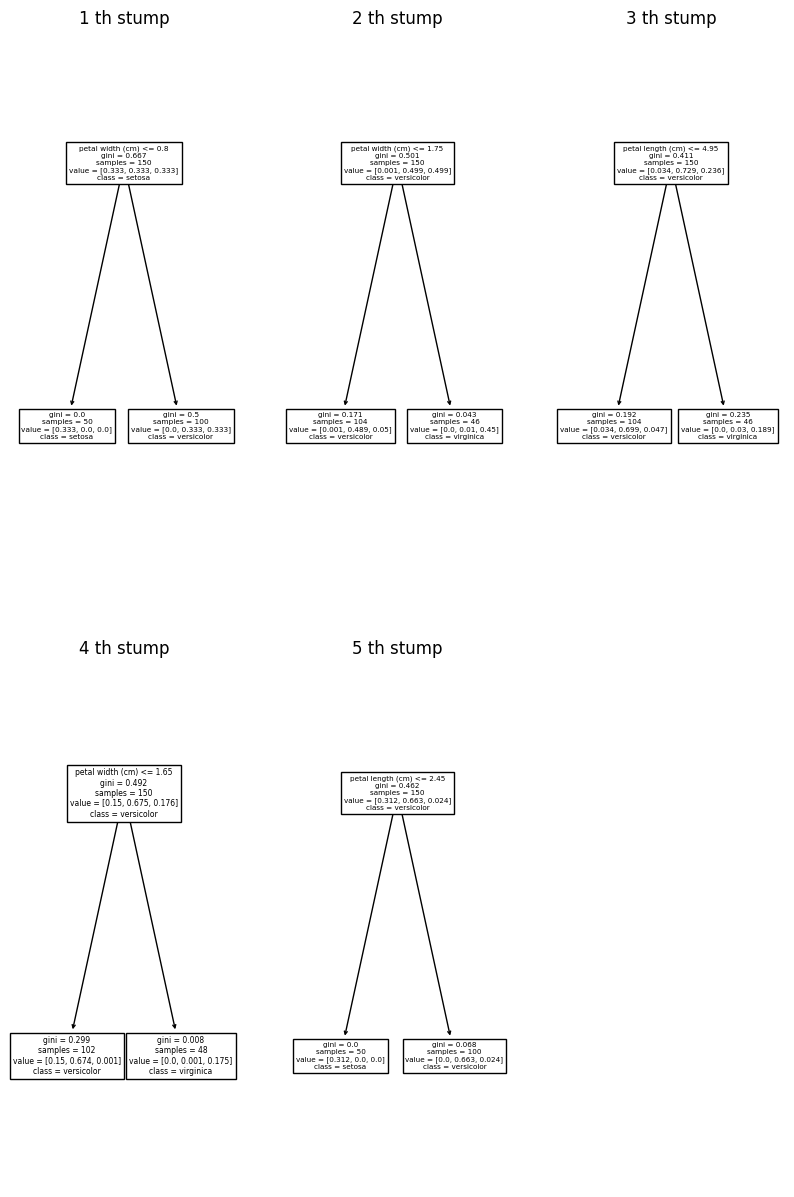

In [ ]:
n_estimator = len(clf.estimators_)
fig = plt.figure(figsize=(10, 15), facecolor='white')

row_num=2
col_num=3
for i in range(n_estimator):
    ax = fig.add_subplot(row_num, col_num, i+1)
    plot_tree(clf.estimators_[i],
              feature_names=X2.columns, ## 박스에 변수 이름 표시
              class_names=clf.classes_, ## 클래스 이름(범주 이름)
              ax=ax
             )
    ax.set_title(f'{i+1} th stump')
plt.show()

### 2. Gradient Boosting

###Gradient boosting
- 강력한 앙상블 기법
- DT를 Boost하여 오차 Gradient를 최소화
- Tree모형을 기반으로 하는 앙상블
- 미분 가능한 loss 함수와 GD 최적화 알고리즘을 사용(=ANN)
- GBM의 하이퍼파라미터
 - The number of trees or estimators in the model, The learning rate of the model, The row and column sampling rate for stochastic models, The maximum tree depth, The minimum tree weight.
- loss : 경사 하강법에서 사용할 비용 함수. 기본값 'devidence'
- learning_rate : GBM이 학습을 진행할 때마다 적용하는 학습률. 기본값은  0.1
  - weak learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수
  - 0 ~ 1 사이의 값
  - 작을 경우, 예측 성능이 높아질 수 있으나 많은 week learner가 순차적인 반복이 필요해 수행시간이 길어지고 local optima에 빠질 수 있음
  - 너무 큰 값을 설정하는 경우, 최적값을 못찰을 수 있어 성능이 떨어질 가능성이 있으나, 시간은 단축
  - learning_rate은 n_estimator와 상호 보완적으로 활용

 - n_estimators: weak learner의 개수이며,기본값은 100
  - weak learner가 많으면 성능 개선이 있지만 많은 시간 소요

- subsample: weak learner가 학습에 사용하는 데이터 샘플링의 비율, 기본값은 1이며, 전체 데이터를 기반으로 학습함. 1보다 작은 값을 설정해서 과적합을 완화시킬 수 있음

In [ ]:
# gradient boosting for classification
from numpy import mean
from numpy import std
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot

#피팅
model = GradientBoostingClassifier().fit(X, y)

# 10개값을 갖는 한 개의 X 샘플에 대한 범주 예측
row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(row)
print('Prediction: %d' % yhat)

Prediction: 1


In [ ]:
#피팅
model = GradientBoostingClassifier(n_estimators=100, max_depth=3).fit(X2, y2)


In [ ]:
## 예측
print(model.predict(X2)[:3])

## 변수 중요도
for i, col in enumerate(X2.columns):
    print(f'{col} Importance : {model.feature_importances_[i]}')

print(model.get_params())
print('Accuracy : ', model.score(X2,y2))


['setosa' 'setosa' 'setosa']
sepal length (cm) Importance : 0.00767740305730266
sepal width (cm) Importance : 0.008848020281731848
petal length (cm) Importance : 0.27601214727170936
petal width (cm) Importance : 0.7074624293892561
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Accuracy :  1.0


### 3.Gradient Boosting With XGBoost
- Extreme Gradient Boosting을 의미하며, sklearn 대신 xgboost 라이브러리 이용
- 계산 효율성을 높이며, 성능도 개선
- colab에 설치되어 있으며 필요 시 !pip install xgboost


In [ ]:
# 분류, xgboost for classification
from numpy import asarray
from xgboost import XGBClassifier

# fit
model = XGBClassifier().fit(X, y)

# prediction
row = [2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]
row = asarray(row).reshape((1, len(row)))
yhat = model.predict(row)
print('Prediction: %d' % yhat)

Prediction: 1


In [ ]:
# fit
y2_1 = pd.get_dummies(y2)
model = XGBClassifier().fit(X2, y2_1)
model.score(X2, y2_1)

0.9933333333333333